<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__
    
    
Some blocks of code are not working. Please see what went wrong. Before submitting a project, you should check if the code works - you can do this by clicking on the Jupiter Hub Kernel and Restart & Run All panels    

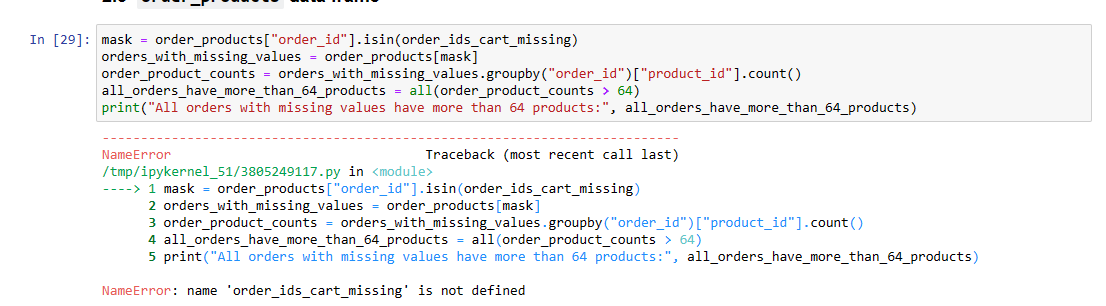
    
    
 
   

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №3__

Some blocks of code are not working

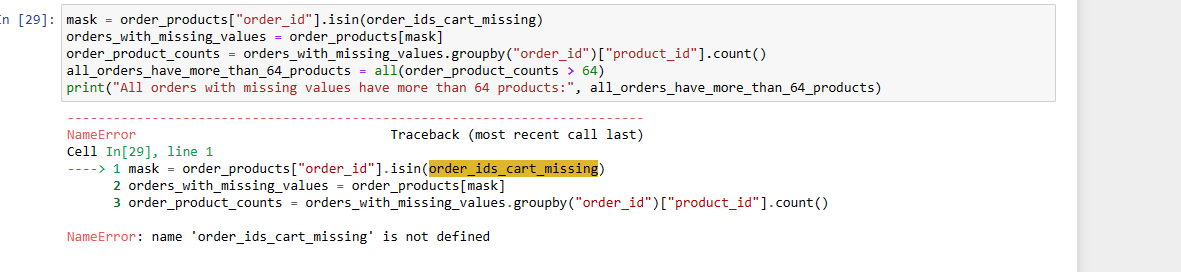

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
instacart = pd.read_csv("/datasets/instacart_orders.csv", sep=";")

In [3]:
products = pd.read_csv("/datasets/products.csv", sep=";")

In [4]:
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")

In [5]:
aisles = pd.read_csv("/datasets/aisles.csv", sep=";")

In [6]:
departments = pd.read_csv("/datasets/departments.csv", sep=";")

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

No familiarity with the data (use info() and head() methods

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
print(instacart.duplicated().sum())

15


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2am_orders = instacart[(instacart['order_dow'] == 3) & (instacart['order_hour_of_day'] == 2)]
wednesday_2am_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Some blocks of code are not working. Please see what went wrong. Before submitting a project, you should check if the code works - you can do this by clicking on the Jupiter Hub Kernel and Restart & Run All panels
    
    
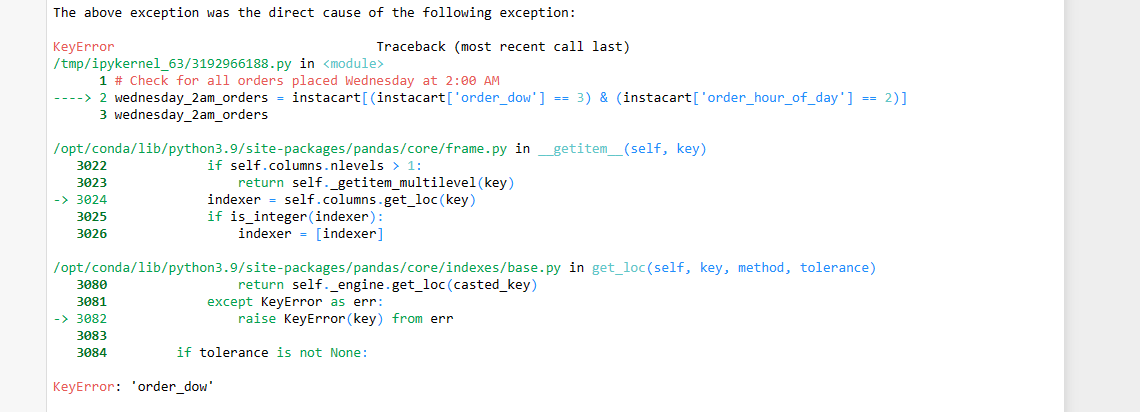

In [9]:
order_duplicate = instacart.drop_duplicates(inplace=True)
order_duplicate

In [10]:
# Double check for duplicate rows
instacart.duplicated().sum()

0

In [11]:
# Double check for duplicate order IDs only
duplicate_order_ids = instacart[instacart.duplicated(subset=['order_id'], keep=False)]
duplicate_order_ids

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `products` data frame

In [12]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [13]:
# Check for just duplicate product IDs
duplicate_product_id = products[products.duplicated(subset=['product_id'], keep=False)]
duplicate_product_id

,product_id,product_name,aisle_id,department_id


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
duplicate_product_names = products[products.duplicated(subset=['product_name'], keep=False)]
duplicate_product_names

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,fresh scent dishwasher detergent with dawn,74,17
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [15]:
# Check for duplicate product names that aren't missing
products = pd.read_csv("/datasets/products.csv", sep=";")
non_null_duplicates = products['product_name'].duplicated(keep=False) & products['product_name']
number_of_duplicates = non_null_duplicates.sum()
"Number of duplicate product names:", number_of_duplicates

('Number of duplicate product names:', 0)

### `departments` data frame

In [16]:
duplicate_department_ids = departments[departments['department_id'].duplicated(keep=False)]
duplicate_department_ids

,department_id,department


In [17]:
departments.duplicated().sum()

0

### `aisles` data frame

In [18]:
duplicate_aisles = aisles[aisles.duplicated(subset=['aisle_id'], keep=False)]
print(duplicate_aisles)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [19]:
aisles.duplicated().sum()

0

### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
duplicate_order_products = order_products[order_products.duplicated(subset=['order_id'])]

In [21]:
# Double check for any other tricky duplicates
order_products = order_products.drop_duplicates(subset=['order_id', 'product_id'], keep='first')

## Find and remove missing values


### `products` data frame

In [22]:
missing_values = products.isnull().sum()

In [23]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names_aisle_100 = products['product_name'].isnull() & (products['aisle_id'])
(f"Missing names in aisle 100: {missing_product_names_aisle_100.sum()}")

'Missing names in aisle 100: 0'

In [24]:
# Are all of the missing product names associated with department ID 21?
missing_names_department_21 = products['product_name'].isnull() & (products['department_id'])
(f"Missing names in department 21: {missing_names_department_21.sum()}")

'Missing names in department 21: 1258'

In [25]:
# What is this ailse and department?
a_d = products.loc[products['department_id']== '21', ['aisle_id', 'department_id']]
a_d

,aisle_id,department_id


In [26]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown', inplace=True)
products

,product_id,product_name,aisle_id,department_id
0,1,None,61,19
1,2,None,104,13
2,3,None,94,7
3,4,None,38,1
4,5,None,5,13
...,...,...,...,...
49689,49690,None,64,7
49690,49691,None,130,14
49691,49692,None,130,14
49692,49693,None,127,11


### `orders` data frame

In [27]:
missing_values = instacart.isnull().sum()
missing_values

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [33]:
is_not_first_order = instacart['order_number'] != 1
is_days_since_prior_missing = instacart['days_since_prior_order'].isnull()
missing_not_first_orders = instacart[is_not_first_order & is_days_since_prior_missing]
num_missing_not_first_orders = len(missing_not_first_orders)

print(f"Number of NOT first orders with missing 'days_since_prior_order': {num_missing_not_first_orders}")

if num_missing_not_first_orders > 0:
 
    instacart.loc[is_not_first_order & is_days_since_prior_missing, 'days_since_prior_order'] = 0

Number of NOT first orders with missing 'days_since_prior_order': 0


### `order_products` data frame

In [64]:
print(order_products.duplicated(subset=['order_id', 'product_id']).sum())

0


In [65]:
# What are the min and max values in this column?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(f"Minimum value in 'add_to_cart_order': {min_value}")
print(f"Maximum value in 'add_to_cart_order': {max_value}")

Minimum value in 'add_to_cart_order': 1.0
Maximum value in 'add_to_cart_order': 64.0


In [66]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values = order_products[order_products['add_to_cart_order'].isna()]
order_ids_cart_missing = missing_values['order_id'].unique()
order_ids_cart_missing

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [67]:
# Do all orders with missing values have more than 64 products?
mask = order_products["order_id"].isin(order_ids_cart_missing)
orders_with_missing_values = order_products[mask]
order_product_counts = orders_with_missing_values.groupby("order_id")["product_id"].count()
all_orders_have_more_than_64_products = all(order_product_counts > 64)
print("All orders with missing values have more than 64 products:", all_orders_have_more_than_64_products)

All orders with missing values have more than 64 products: True


In [69]:
# Replace missing values with 999 and convert column to integer type
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [ ]:
instacart['order_hour_of_day'].unique()    
print("Hour of the day - min:", instacart['order_hour_of_day'].min(), "max:", instacart['order_hour_of_day'].max())
print("Day of week - min:", instacart['order_dow'].min(), "max:", instacart['order_dow'].max())

In [ ]:
import matplotlib.pyplot as plt
instacart['order_hour_of_day'].hist(bins=24, edgecolor="black")
plt.title('Orders Distribution by Hour of Day')
plt.xlabel("Hour of Day")
plt.ylabel("Numbers of Orders")
plt.xticks(range(0, 25))  # Assuming you want ticks for every hour from 0 to 24

plt.show()

### [A2] What time of day do people shop for groceries?

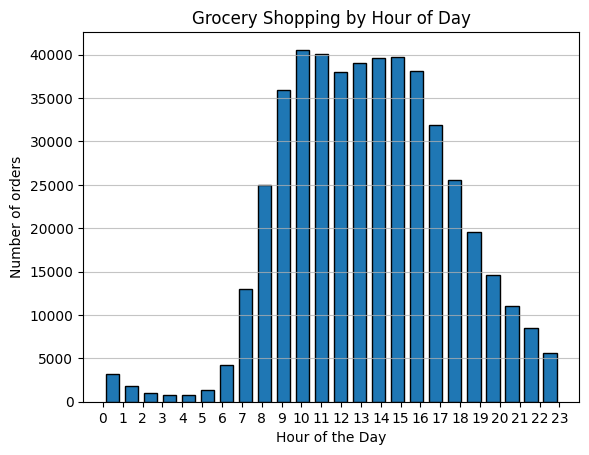

In [43]:
plt.hist(instacart['order_hour_of_day'], bins=24, edgecolor='black', rwidth=0.7)
plt.title('Grocery Shopping by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of orders')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()

### [A3] What day of the week do people shop for groceries?

In [ ]:
plt.hist(instacart['order_dow'], bins=24, edgecolor='black', rwidth=0.7)
plt.title('Grocery Shopping by day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Number by orders')
plt.xticks(range(0,7))
plt.grid(axis='y', alpha=0.75)
plt.show()

### [A4] How long do people wait until placing another order?

In [ ]:
plt.hist(instacart['days_since_prior_order'].dropna(), bins=30, edgecolor='black', rwidth=0.7)
plt.title('Wait Time Until Next Order')
plt.xlabel('Days of Wait Time')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
mean_wait = instacart['days_since_prior_order'].mean()
median_wait = instacart['days_since_prior_order'].median()
mode_wait = instacart['days_since_prior_order'].mode()[0]

print(f"Mean wait time: {mean_wait:.2f} days")
print(f"Median wait time: {median_wait} days")
print(f"Most common wait time(Mode): {mode_wait} days")

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [ ]:
wednesday_orders = instacart[instacart['order_dow'] == 3]
saturday_orders = instacart[instacart['order_dow'] == 6]

In [ ]:
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesday')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Saturday')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hours on Wednesday vs. Saturday')
plt.xticks(range(0, 24))
plt.legend()

plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [ ]:
order_counts = instacart.groupby('user_id') ['order_id'].nunique()

In [ ]:
import matplotlib.pyplot as plt
order_counts = instacart.groupby('user_id')['order_id'].nunique()
order_counts.hist(bins=range(1, order_counts.max() + 1), grid=False)
plt.title('Distribution of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [ ]:
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")
products = pd.read_csv("/datasets/products.csv", sep=";")

In [ ]:
product_order_counts = order_products.groupby('product_id').size().reset_index(name='order_count')
popular_products = product_order_counts.merge(products, on='product_id')
top20_products = popular_products.sort_values(by='order_count', ascending=False).head(20)
top20_products

In [ ]:
plt.barh(top20_products['product_name'], top20_products['order_count'], color='pink')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.title('Top 20 Most Popular Products')
plt.gca().invert_yaxis()
plt.show()

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [ ]:
items_per_order = order_products.groupby('order_id')['product_id'].count()

In [ ]:
items_per_order.plot(kind="hist", bins=20, title='Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [56]:
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")
products = pd.read_csv("/datasets/products.csv", sep=";")

In [53]:
reorder_counts = order_products[order_products['reordered'] ==1].groupby('product_id').size().reset_index(name='reorder_count')
reorder_counts = reorder_counts.merge(products, on='product_id')
top20_reorders = reorder_counts.sort_values(by='reorder_count', ascending=False).head(20)
top20_reorders

,product_id,reorder_count,product_name,aisle_id,department_id
18104,24852,55763,None,24,4
9528,13176,44450,None,24,4
15368,21137,28639,None,24,4
15936,21903,26233,None,123,4
34407,47209,23629,None,24,4
34828,47766,18743,None,24,4
20285,27845,16251,None,84,16
34725,47626,15044,None,24,4
20375,27966,14748,None,123,4
12193,16797,13945,None,24,4


### [C3] For each product, what proportion of its orders are reorders?

In [50]:
reorder_statistics = order_products.groupby('product_id')['reordered'].agg(['sum', 'count'])

In [51]:
reorder_statistics['reorder_proportion'] = reorder_statistics['sum'] / reorder_statistics['count']

In [52]:
reorder_statistics.head()

,sum,count,reorder_proportion
product_id,,,
1,158,280,0.564286
2,0,11,0.000000
3,31,42,0.738095
4,25,49,0.510204
7,1,2,0.500000


### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 